In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def filter_by_freq(df: pd.DataFrame, column: str, min_freq: int) -> pd.DataFrame:
    freq = df[column].value_counts()
    frequent_values = freq[freq > min_freq].index
    return df[df[column].isin(frequent_values)]
def create_id_map(sampled_ids):
    sampled_ids = sorted(sampled_ids)
    id_map = {x:i for i,x in enumerate(sampled_ids)}
    return id_map
def print_sample_summary(df, user_col_name='userId', item_col_name='movieId'):
    n_unique_users = len(set(df[user_col_name]))
    n_unique_items = len(set(df[item_col_name]))
    n_ratings = len(df)
    print(n_ratings, " ratings, ", n_unique_users, " users, ", n_unique_items, " items")
    print("Sparsity: ", n_ratings/(n_unique_users*n_unique_items))

# Getting all data
users = pd.read_csv('../datasets/ml-20m/ratings.csv')
print_sample_summary(users)
n_runs = 5

20000263  ratings,  138493  users,  26744  items
Sparsity:  0.0053998478135544505


In [2]:
# Filtering out users with <100 ratings --> 51869 users , 26654 items
# Sampling 5000 users from this set randomly
filtered_users = filter_by_freq(users, 'userId', 100)
userIds = list(set(filtered_users['userId'].to_list()))
sampled_users = np.random.choice(userIds, 5000, replace=False)
f_s_users = filtered_users[filtered_users['userId'].isin(sampled_users)]
sampled_uids = list(set(f_s_users['userId']))
sampled_mids = list(set(f_s_users['movieId']))
print_sample_summary(f_s_users)

# save this to diff splits in the datasets directory...
sampled_uids = list(set(f_s_users['userId']))
sampled_mids = list(set(f_s_users['movieId']))

uid_map = create_id_map(sampled_uids)
mid_map = create_id_map(sampled_mids)
f_s_users['uid'] = f_s_users['userId'].map(uid_map)
f_s_users['mid'] = f_s_users['movieId'].map(mid_map)
f_s_users.to_csv('../datasets/ml-20m-uniform/u.data')


for i in range(n_runs):
    X = f_s_users.copy()
    X = X.sample(frac=1)
    uids = X.pop('uid').to_frame()
    X_train, X_test, y_train, y_test = train_test_split(X, uids,stratify=uids, test_size=0.2)
    X_train['uid'] = y_train.values.squeeze()
    X_test['uid'] = y_test.values.squeeze()
    X_train.to_csv('../datasets/ml-20m-uniform/u' + str(i) + '.base')
    X_test.to_csv('../datasets/ml-20m-uniform/u' + str(i) + '.test')

1512316  ratings,  5000  users,  17400  items
Sparsity:  0.017382942528735634


/local/divyas/.conda/envs/uncertainty/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/local/divyas/.conda/envs/uncertainty/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/local/divyas/.conda/envs/uncertainty/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [3]:
# Create very small dataset (100 users)

# Sampling dataset
sampled_users = np.random.choice(userIds, 1000, replace=False)
tiny_sampled_users = filtered_users[filtered_users['userId'].isin(sampled_users)]
print_sample_summary(tiny_sampled_users)

# Saving splits
sampled_uids = list(set(tiny_sampled_users['userId']))
sampled_mids = list(set(tiny_sampled_users['movieId']))
uid_map = create_id_map(sampled_uids)
mid_map = create_id_map(sampled_mids)
tiny_sampled_users['uid'] = tiny_sampled_users['userId'].map(uid_map)
tiny_sampled_users['mid'] = tiny_sampled_users['movieId'].map(mid_map)
tiny_sampled_users.to_csv('../datasets/ml-20m-tiny/u.data')

for i in range(n_runs):
    X = tiny_sampled_users.copy()
    X = X.sample(frac=1)
    uids = X.copy().pop('uid').to_frame()
    X_train, X_test, y_train, y_test = train_test_split(X, uids,stratify=uids, test_size=0.2)
    X_train['uid'] = y_train.values.squeeze()
    X_test['uid'] = y_test.values.squeeze()
    X_train.to_csv('../datasets/ml-20m-tiny/u' + str(i) + '.base')
    X_test.to_csv('../datasets/ml-20m-tiny/u' + str(i) + '.test')

305676  ratings,  1000  users,  11529  items
Sparsity:  0.026513661202185793


/local/divyas/.conda/envs/uncertainty/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/local/divyas/.conda/envs/uncertainty/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/local/divyas/.conda/envs/uncertainty/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [4]:
dataset_name = 'ml-20m-tiny'
split_num = 0
ratings = pd.read_csv('datasets/' + dataset_name + '/u.data') 
ratings_matrix = ratings.pivot_table(index=['uid'],columns=['mid'],values='rating').reset_index(drop=True)
ratings_matrix.fillna(0, inplace = True)
data_matrix = np.array(ratings_matrix)

tr_ratings = pd.read_csv('datasets/' + dataset_name + '/u' + str(split_num) + '.base')
test_ratings = pd.read_csv('datasets/' + dataset_name + '/u' + str(split_num) + '.test')
train_idxs = tr_ratings[['uid', 'mid']].values 
test_idxs = test_ratings[['uid', 'mid']].values 
train_idxs = list(map(tuple, train_idxs))
test_idxs = list(map(tuple, test_idxs))

FileNotFoundError: [Errno 2] File b'datasets/ml-20m-tiny/u.data' does not exist: b'datasets/ml-20m-tiny/u.data'

In [ ]:
ratings[ratings['uid'] == 50].head(), tr_ratings[tr_ratings['uid'] == 50].head()

In [ ]:
# Sampling the 6000 users and 4000 movies with the highest # of ratings
sampled_uids = users['userId'].value_counts()[:6000].index.to_list()
sampled_mids = users['movieId'].value_counts()[:4000].index.to_list()
sampled_ratings  = users[users['userId'].isin(sampled_uids) & users['movieId'].isin(sampled_mids)]
sampled_ratings.to_csv('./datasets/ml-20m/u.data')
len(set(sampled_ratings['userId'])), len(set(sampled_ratings['movieId']))

In [ ]:
uid_map = create_id_map(sampled_uids)
mid_map = create_id_map(sampled_mids)
sampled_ratings['uid'] = sampled_ratings['userId'].map(uid_map)
sampled_ratings['mid'] = sampled_ratings['movieId'].map(mid_map)

In [ ]:
n_ratings = len(sampled_ratings)
# save sampled_ratings to u.data
n_runs = 2
uids = sampled_ratings.copy().pop('uid').to_frame()
X = sampled_ratings
for i in range(n_runs):
    X = X.sample(frac=1)
    X_train, X_test, y_train, y_test = train_test_split(X, uids,stratify=uids, test_size=0.2)
    X_train['uid'] = y_train.values.squeeze()
    X_test['uid'] = y_test.values.squeeze()
    X_train.to_csv('./datasets/ml-20m/u' + str(i) + '.base')
    X_test.to_csv('./datasets/ml-20m/u' + str(i) + '.test')

# Initialization plots

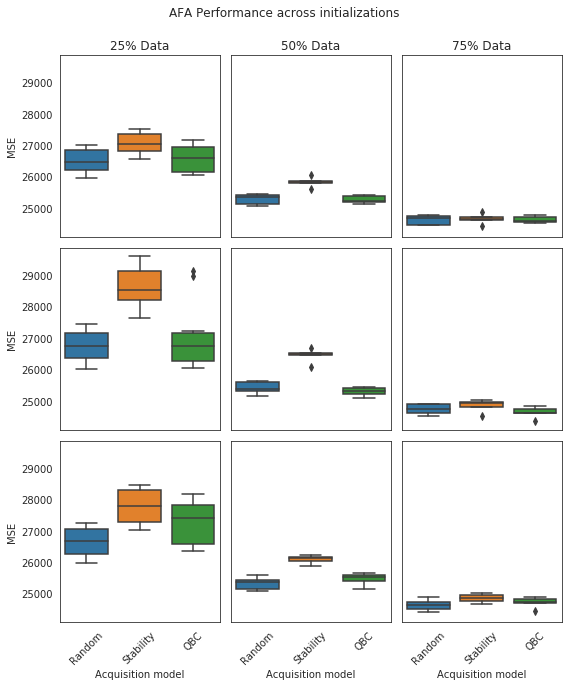

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('white')
fig, ax = plt.subplots(3, 3, figsize=(8, 10), sharey=True)
pct_opts = [(.25, "25"), (.50, "50"), (.75, "75")]
init_modes = ['uniform', 'user_subset', 'item_subset']
for i, init_mode in enumerate(init_modes):
    expmt = '5_False_0.1_0.4_' + init_mode + '_21000_5250_0_30_1_213973_0.5_0.5_0_0.85'
    data = pd.concat([pd.read_csv('../results/ml-20m-tiny/Weighted/' + expmt + '/results_df'),
                      pd.read_csv('../results/ml-20m-tiny/Random/' + expmt + '/results_df'),
                      pd.read_csv('../results/ml-20m-tiny/QBC/' + expmt + '/results_df')])
    for j, pct_opt in enumerate(pct_opts):
        pct_available, pct_str = pct_opt        
        data_one_m = data[(data['pct_available'] > pct_available - .05) & (data['pct_available'] < pct_available + .05)]
        sns.boxplot(x='acq_model', y='micro_mse',  data=data_one_m, ax=ax[i][j], order=['Random', 'QBC', 'Weighted'])
       ##ax[i][j].set_yticks([2600, 2800, 3000])

        if i == 0:
            ax[i][j].set_title(pct_str + "% Data")

        if i == 2:
            ax[i][j].set_xlabel("Acquisition model")
        else:
            ax[i][j].set_xlabel("")
            ax[i][j].set_xticks([])
        if j == 0:
            ax[i][j].set_ylabel("MSE")
            #ax[i][j].set_yticks([.25, .50, .75])
            #ax[i][j].set_yticks([7300, 7750, 8200])
        else:
#             ax[i][j].set_yticks([])
            ax[i][j].set_ylabel("")
        ax[i][j].set_xticklabels(['Random', 'Stability', 'QBC'], rotation=45)

        #ax[i][j].set_ylim(2500, 3050)
plt.suptitle("AFA Performance across initializations")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [ ]:
pct_available = .5
init_mode = 'user_subset'
expmt = '20000_0.1_1_0.5_0.5_' + init_mode + '_uniform_0.0_30_False_1000_5'
data = pd.concat([pd.read_csv('./results/ml-20m-tiny/Weighted/' + expmt + '/results_df'),
                  pd.read_csv('./results/ml-20m-tiny/Random/' + expmt + '/results_df'),
                  pd.read_csv('./results/ml-20m-tiny/QBC/' + expmt + '/results_df')])
data[(data['pct_available'] > pct_available - .02) & (data['pct_available'] < pct_available + .02)]

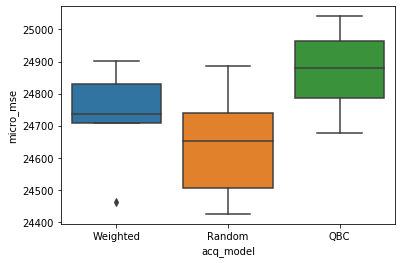

In [15]:
sns.boxplot(x='acq_model', y='micro_mse', data=data_one_m)

In [9]:
data['pct_available'] > pct_available - .02 

0     0.124998
1     0.210873
2     0.296749
3     0.382625
4     0.468500
        ...   
50    0.640251
51    0.726127
52    0.812002
53    0.897878
54    0.983753
Name: pct_available, Length: 165, dtype: float64

In [11]:
pct_available

0.75